# The Sparks Foundation GRIP September 2022 Data Science & Business Analytics 
## Aanshula Shetty



>Predict the percentage of a student based on the number of study hours

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#Check for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#statistical data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

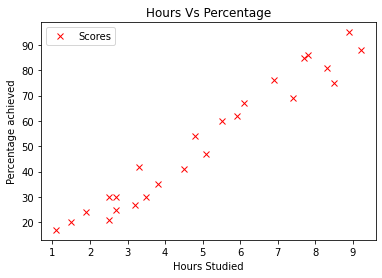

In [7]:
df.plot(x='Hours', y='Scores', color='red', style='x')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage achieved')
plt.title('Hours Vs Percentage')
plt.show()

#### The graph shows a positive correlation between the two variables 

### Encoding data

In [9]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [10]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting data into training & test sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
X_train.shape, y_train.shape

((20, 1), (20,))

In [14]:
X_test.shape, y_test.shape

((5, 1), (5,))

In [15]:
df.shape

(25, 2)

### Performing Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

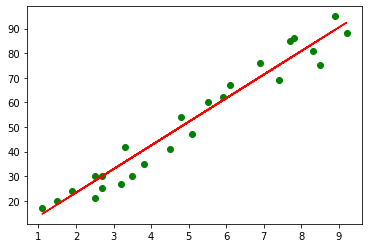

In [35]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color='green')
plt.plot(X, line, color='red');
plt.show()

### Evaluating the model

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
np.sqrt(mean_squared_error(y_test, y_preds))

5.778983084610573

In [32]:
mae = mean_absolute_error(y_test, y_preds)
mae

4.94326939833767

### Making predictions

In [22]:
print(X_test)
y_preds = regressor.predict(X_test)

[[5.1]
 [3.5]
 [5.5]
 [2.7]
 [3.2]]


In [23]:
#Comparing the actual and predicted values
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})

In [24]:
df1

,Actual,Predicted
0,47,53.065960
1,30,37.705571
2,60,56.906057
3,30,30.025376
4,27,34.825498


In [34]:
#Predicted score if a student studies for 9.25 hours/day
h = pd.DataFrame([9.25])
score = regressor.predict(h)
print('Student who studies for', h[0][0], 'hours is estimated to score', score[0])

Student who studies for 9.25 hours is estimated to score 92.90696942430051
